In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

In [3]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
num_samples = df.shape[0]
print("Number of samples:", num_samples)

Number of samples: 145460


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
print(df.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


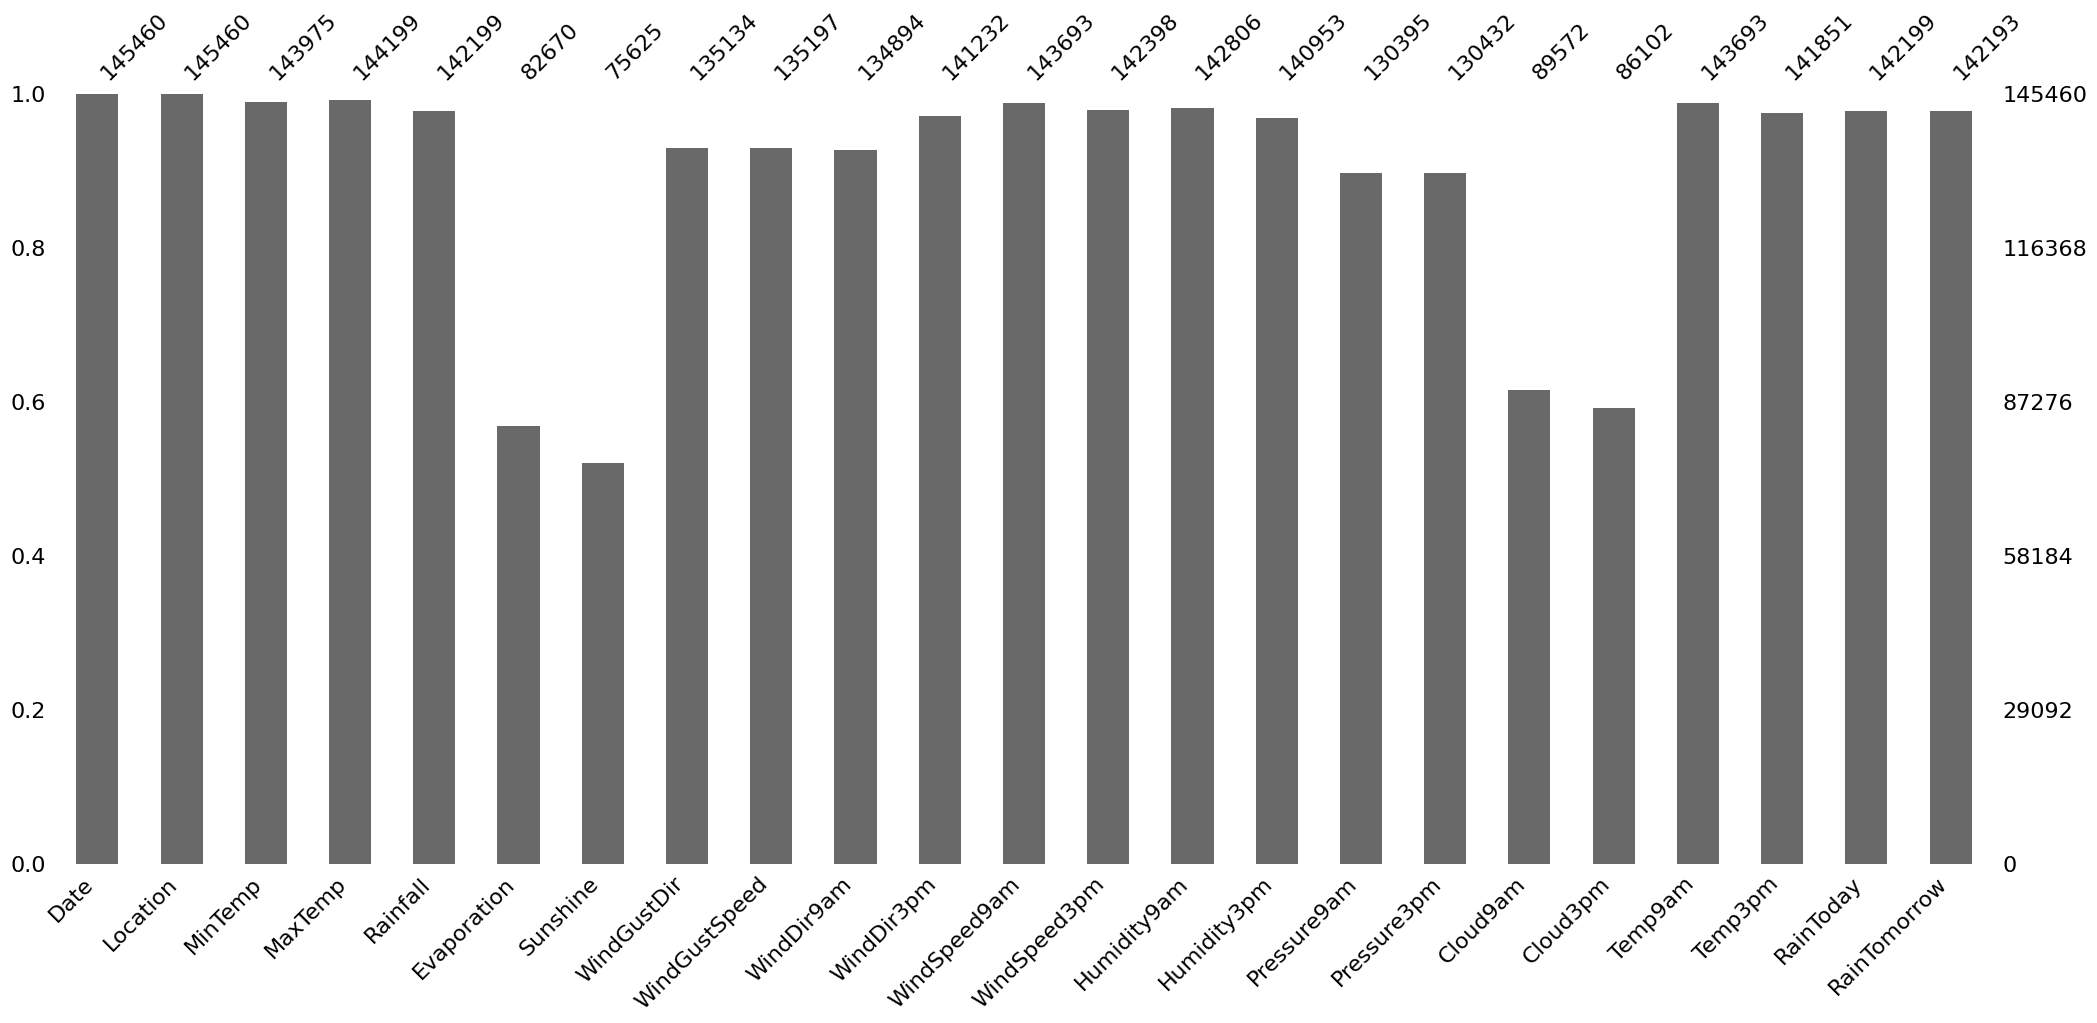

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

# Count missing values
print(df.isnull().sum())

# Visualize missing values
msno.bar(df)
plt.show()

In [8]:
df = df.drop(columns=["Date", "Location"], errors="ignore")

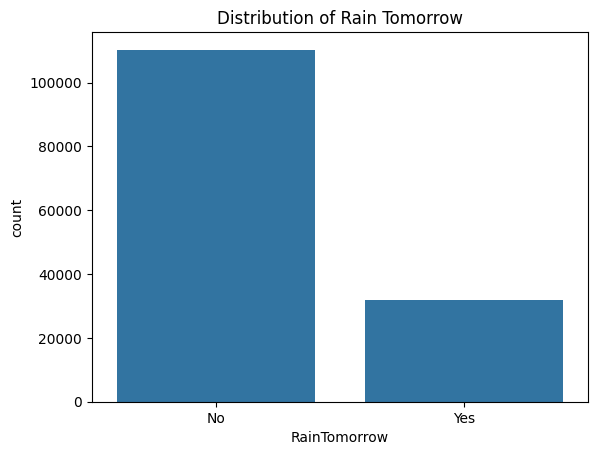

In [9]:
import seaborn as sns
sns.countplot(x=df['RainTomorrow'])
plt.title("Distribution of Rain Tomorrow")
plt.show()

In [10]:
df=df.dropna(subset=['RainTomorrow'])
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)
df.fillna(df.mode().iloc[0] ,inplace=True)

In [11]:
for column in df.select_dtypes(include=["object"]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3616\80879951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [13]:
X = df.drop(columns=["RainTomorrow"], errors="ignore")
y = df["RainTomorrow"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [16]:
balanced_data = pd.concat([pd.DataFrame(X_train_balanced, columns=X.columns),
                           pd.Series(y_train_balanced, name="RainTomorrow")], axis=1)
balanced_data.to_csv("balanced_weatherAUS.csv", index=False)

print("Balanced dataset created and saved as 'balanced_weatherAUS.csv'.")

Balanced dataset created and saved as 'balanced_weatherAUS.csv'.


In [17]:
df = pd.read_csv("balanced_weatherAUS.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,15.1,23.9,0.0,5.469824,7.624853,11,67.0,7,13,19.0,...,38.0,68.0,1001.9,1002.4,4.437189,4.503167,19.8,14.3,0,0
1,9.7,14.2,7.6,5.469824,7.624853,15,50.0,14,13,15.0,...,91.0,56.0,1008.2,1007.7,4.437189,4.503167,11.1,13.4,1,1
2,13.2,25.4,0.0,3.200000,8.800000,1,30.0,13,0,6.0,...,79.0,63.0,1025.2,1021.5,6.000000,5.000000,21.2,24.0,0,0
3,7.6,14.8,0.0,4.000000,7.000000,14,94.0,14,14,30.0,...,52.0,45.0,1004.6,1001.4,4.437189,4.503167,11.1,12.9,0,0
4,12.9,22.2,0.0,4.000000,7.900000,8,37.0,12,10,15.0,...,69.0,52.0,1023.0,1021.2,6.000000,2.000000,18.8,20.6,0,0


In [18]:
print(y_train_balanced.value_counts())

RainTomorrow
0    88218
1    88218
Name: count, dtype: int64


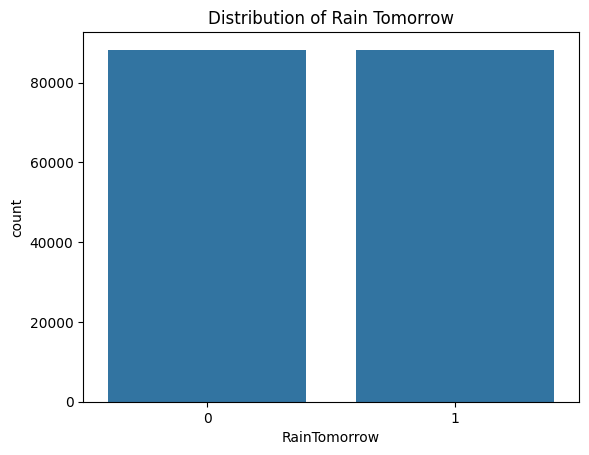

In [19]:
import seaborn as sns

# Count plot
sns.countplot(x=df['RainTomorrow'])
plt.title("Distribution of Rain Tomorrow")
plt.show()

In [20]:
X = balanced_data.drop(columns=["RainTomorrow"])  # Features
y = balanced_data["RainTomorrow"]

In [21]:
df=df.dropna(subset=['RainTomorrow'])
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)
df.fillna(df.mode().iloc[0] ,inplace=True)

In [22]:
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [23]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [24]:
feautres = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am', 'Cloud3pm']
X=df[feautres]
y=df['RainTomorrow']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

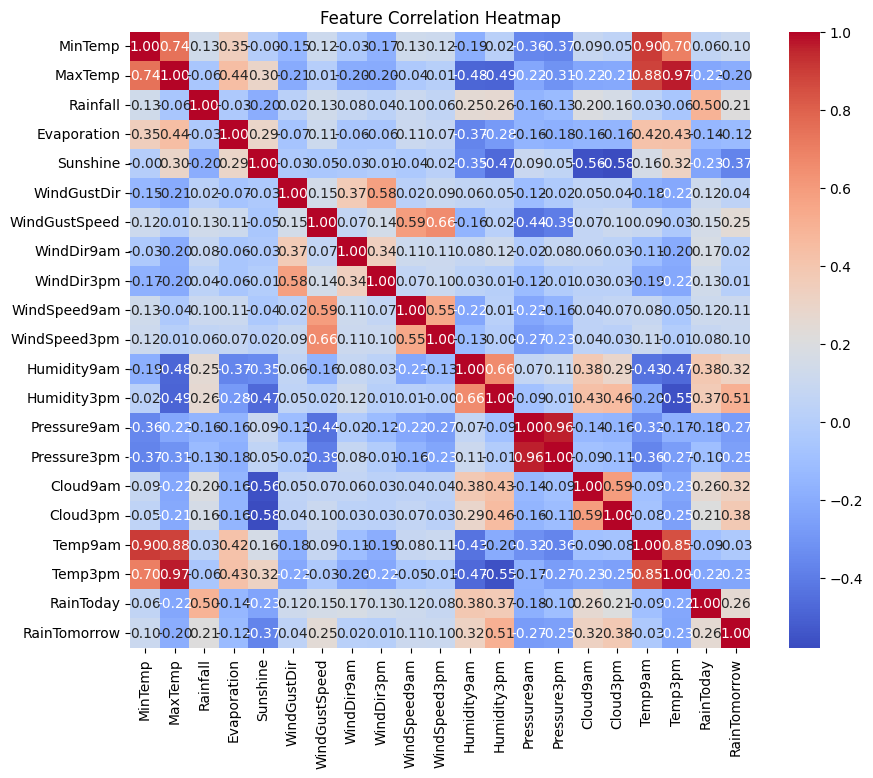

In [27]:
import seaborn as sns
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
print(f"Number of Features: {len(feautres)}")
print(f"Number of Importances: {len(importances)}")

Number of Features: 12
Number of Importances: 12


          Feature  Importance
7     Humidity3pm    0.195962
2        Rainfall    0.134466
11       Cloud3pm    0.092269
4        Sunshine    0.080801
5   WindGustSpeed    0.075184
9     Pressure3pm    0.071222
10       Cloud9am    0.070632
6     Humidity9am    0.067699
8     Pressure9am    0.060288
1         MaxTemp    0.059330
0         MinTemp    0.057653
3     Evaporation    0.034494


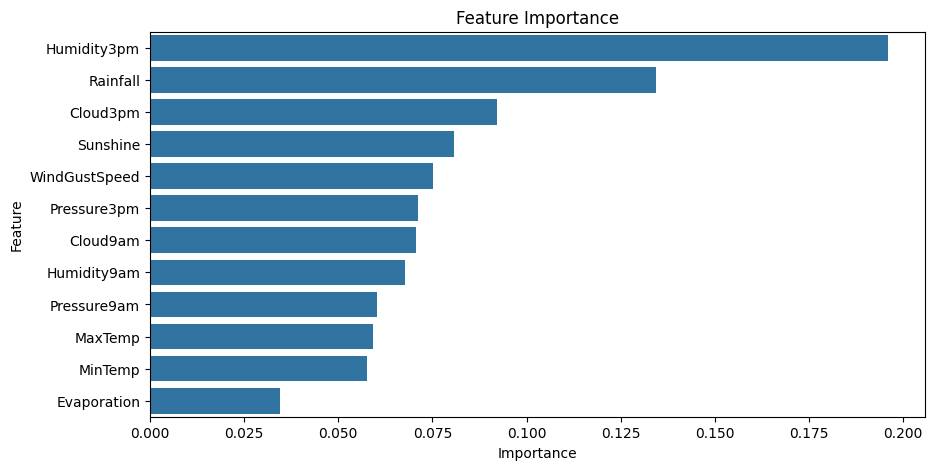

In [29]:
importances = model.feature_importances_

# Convert to a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feautres, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title("Feature Importance")
plt.show()

In [30]:
threshold = 0.02

# Select only important features
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

print("Selected Important Features:", important_features)


Selected Important Features: ['Humidity3pm', 'Rainfall', 'Cloud3pm', 'Sunshine', 'WindGustSpeed', 'Pressure3pm', 'Cloud9am', 'Humidity9am', 'Pressure9am', 'MaxTemp', 'MinTemp', 'Evaporation']



🔹 Random Forest Model Performance 🔹
Accuracy: 0.8963103604624801
Confusion Matrix:
 [[15694  1751]
 [ 1908 15935]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90     17445
           1       0.90      0.89      0.90     17843

    accuracy                           0.90     35288
   macro avg       0.90      0.90      0.90     35288
weighted avg       0.90      0.90      0.90     35288



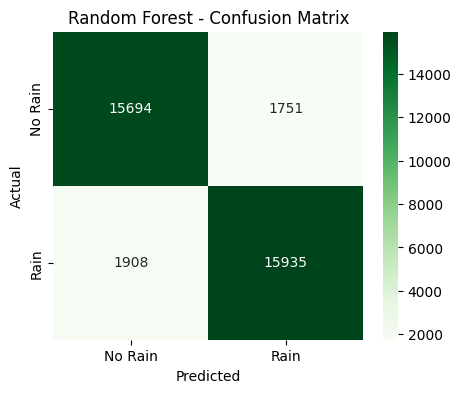

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
rf_preds = rf.predict(X_test)

# Evaluate the model
print("\n🔹 Random Forest Model Performance 🔹")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Greens", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [32]:


train_acc_rf = accuracy_score(y_train, rf.predict(X_train))


test_acc_rf = accuracy_score(y_test, rf_preds)


# Store results in a DataFrame
acc_df = pd.DataFrame({
    "Model": [ "Random Forest"],
    "Training Accuracy": [ train_acc_rf],
    "Test Accuracy": [ test_acc_rf]
})

print(acc_df)

           Model  Training Accuracy  Test Accuracy
0  Random Forest           0.999965        0.89631


In [33]:
from sklearn.model_selection import cross_val_score

rf=RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Random Forest Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Random Forest Cross-Validation Accuracy Scores: [0.89018774 0.89404888 0.89142756 0.89156541 0.89223848]
Mean CV Accuracy: 0.8918936153304259


In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"CV Accuracy (Mean): {np.mean(cv_scores):.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.8963
CV Accuracy (Mean): 0.8919


In [36]:
rf = RandomForestClassifier(
    n_estimators=200,      # Reduce trees (default 100)
    max_depth=10,          # Limit tree depth
    min_samples_split=10,  # Require more samples per split
    min_samples_leaf=5,
     max_features="sqrt",
    bootstrap=True,
    random_state=42
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluate
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Tuned Random Forest Accuracy: 0.8383869870777602


In [37]:
train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc = accuracy_score(y_test, rf_preds)

print(f"🔹 Training Accuracy (Tuned): {train_acc:.4f}")
print(f"🔹 Test Accuracy (Tuned): {test_acc:.4f}")


🔹 Training Accuracy (Tuned): 0.8499
🔹 Test Accuracy (Tuned): 0.8384



🔹 Tuned Random Forest Model Performance 🔹
Accuracy: 0.8383869870777602
Confusion Matrix:
 [[14688  2757]
 [ 2946 14897]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84     17445
           1       0.84      0.83      0.84     17843

    accuracy                           0.84     35288
   macro avg       0.84      0.84      0.84     35288
weighted avg       0.84      0.84      0.84     35288



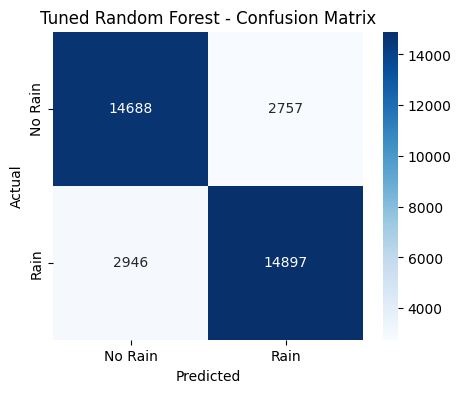

In [38]:
# Initialize Tuned Random Forest
rf = RandomForestClassifier(
    n_estimators=200,      # More trees for better performance
    max_depth=10,          # Limit tree depth to avoid overfitting
    min_samples_split=10,  # Require more samples per split
    min_samples_leaf=5,    # Minimum samples per leaf
    max_features="sqrt",   # Consider sqrt(number of features) for splits
    bootstrap=True,        # Use bootstrap sampling
    random_state=42
)

# Train the tuned model
rf.fit(X_train, y_train)

# Make predictions
rf_preds_tuned = rf.predict(X_test)

# Evaluate the tuned model
print("\n🔹 Tuned Random Forest Model Performance 🔹")
print("Accuracy:", accuracy_score(y_test, rf_preds_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds_tuned))
print("Classification Report:\n", classification_report(y_test, rf_preds_tuned))

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rf_preds_tuned), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



🔹 Logistic Regression Model Performance 🔹
Accuracy: 0.7756461119927454
Confusion Matrix:
 [[13764  3681]
 [ 4236 13607]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78     17445
           1       0.79      0.76      0.77     17843

    accuracy                           0.78     35288
   macro avg       0.78      0.78      0.78     35288
weighted avg       0.78      0.78      0.78     35288



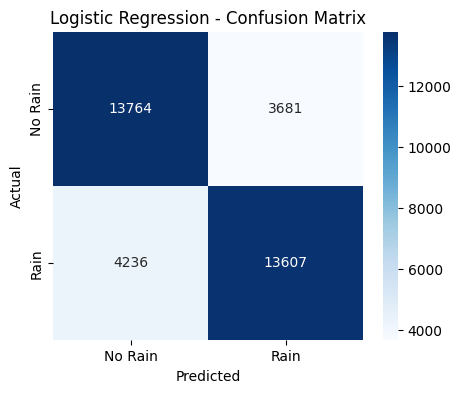

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
log_reg_preds = log_reg.predict(X_test)

# Evaluate the model
print("\n🔹 Logistic Regression Model Performance 🔹")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_preds))
print("Classification Report:\n", classification_report(y_test, log_reg_preds))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, log_reg_preds), annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



🔹 XGBoost Model Performance 🔹
Accuracy: 0.8916345499886646
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89     17445
           1       0.92      0.86      0.89     17843

    accuracy                           0.89     35288
   macro avg       0.89      0.89      0.89     35288
weighted avg       0.89      0.89      0.89     35288



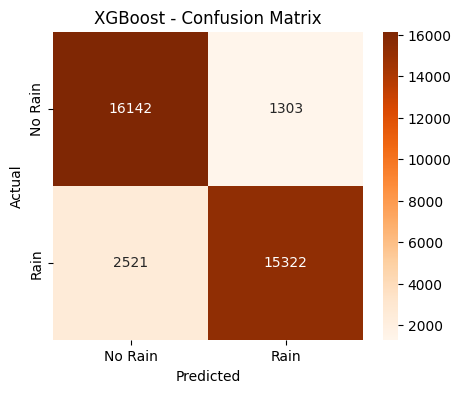

In [40]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb.predict(X_test)

# Evaluate the model
print("\n🔹 XGBoost Model Performance 🔹")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt="d", cmap="Oranges", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.778594       0.775646
1        Random Forest           0.849938       0.838387
2              XGBoost           0.907778       0.891635


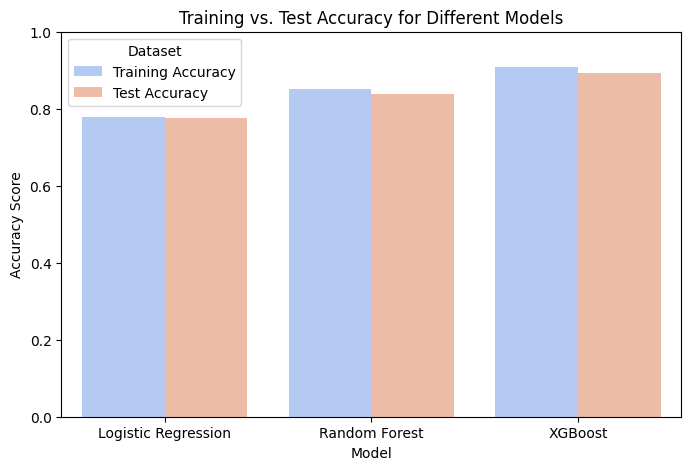

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Get training accuracy
train_acc_log_reg = accuracy_score(y_train, log_reg.predict(X_train))
train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
train_acc_xgb = accuracy_score(y_train, xgb.predict(X_train))

# Get test accuracy
test_acc_log_reg = accuracy_score(y_test, log_reg_preds)
test_acc_rf = accuracy_score(y_test, rf_preds)
test_acc_xgb = accuracy_score(y_test, xgb_preds)

# Store results in a DataFrame
acc_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Training Accuracy": [train_acc_log_reg, train_acc_rf, train_acc_xgb],
    "Test Accuracy": [test_acc_log_reg, test_acc_rf, test_acc_xgb]
})

print(acc_df)

# Melt the DataFrame for visualization
acc_df_melted = acc_df.melt(id_vars="Model", var_name="Dataset", value_name="Accuracy")

# Plot training vs test accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=acc_df_melted, palette="coolwarm")

plt.title("Training vs. Test Accuracy for Different Models")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.legend(title="Dataset")
plt.show()




In [42]:
# Get training accuracy
train_acc_log_reg = accuracy_score(y_train, log_reg.predict(X_train))
train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
train_acc_xgb = accuracy_score(y_train, xgb.predict(X_train))

# Get test accuracy
test_acc_log_reg = accuracy_score(y_test, log_reg_preds)
test_acc_rf = accuracy_score(y_test, rf_preds)
test_acc_xgb = accuracy_score(y_test, xgb_preds)

# Store results in a DataFrame
acc_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Training Accuracy": [train_acc_log_reg, train_acc_rf, train_acc_xgb],
    "Test Accuracy": [test_acc_log_reg, test_acc_rf, test_acc_xgb]
})

print(acc_df)

                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.778594       0.775646
1        Random Forest           0.849938       0.838387
2              XGBoost           0.907778       0.891635


In [43]:
rf = RandomForestClassifier(
    n_estimators=300,      # Increase trees for stability
    max_depth=15,          # Allow more depth (better patterns)
    min_samples_split=5,   # Less restrictive split
    min_samples_leaf=2,    # Reduce min leaf samples (more details)
    max_features="log2",   # Change feature selection strategy
    bootstrap=True,        # Enable randomness
    random_state=42
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluate
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Tuned Random Forest Accuracy: 0.8693606891861256


In [44]:

importances = model.feature_importances_
print(f"Number of Features: {len(feautres)}")
print(f"Number of Importances: {len(importances)}")

Number of Features: 12
Number of Importances: 12


          Feature  Importance
7     Humidity3pm    0.236185
2        Rainfall    0.173324
11       Cloud3pm    0.118474
4        Sunshine    0.093237
10       Cloud9am    0.078649
5   WindGustSpeed    0.062150
9     Pressure3pm    0.058472
6     Humidity9am    0.048638
8     Pressure9am    0.044831
1         MaxTemp    0.031782
0         MinTemp    0.030421
3     Evaporation    0.023839


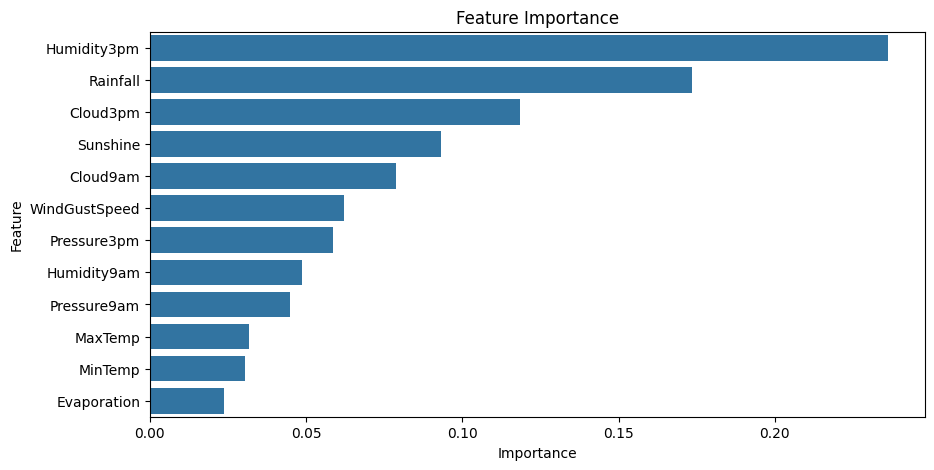

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feautres, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display
print(feature_importance_df)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title("Feature Importance")
plt.show()


In [46]:
# Get training accuracy
train_acc_log_reg = accuracy_score(y_train, log_reg.predict(X_train))
train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
train_acc_xgb = accuracy_score(y_train, xgb.predict(X_train))

# Get test accuracy
test_acc_log_reg = accuracy_score(y_test, log_reg_preds)
test_acc_rf = accuracy_score(y_test, rf_preds)
test_acc_xgb = accuracy_score(y_test, xgb_preds)

# Store results in a DataFrame
acc_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Training Accuracy": [train_acc_log_reg, train_acc_rf, train_acc_xgb],
    "Test Accuracy": [test_acc_log_reg, test_acc_rf, test_acc_xgb]
})

print(acc_df)

                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.778594       0.775646
1        Random Forest           0.919170       0.869361
2              XGBoost           0.907778       0.891635


In [47]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
cv_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

print("XGBoost Cross-Validation Accuracy Scores:", cv_scores_xgb)
print("Mean CV Accuracy:", np.mean(cv_scores_xgb))


XGBoost Cross-Validation Accuracy Scores: [0.89064825 0.89206518 0.89171095 0.89170711 0.88990046]
Mean CV Accuracy: 0.8912063875846028


In [48]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [49]:
train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb.predict(X_test))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.9077776518264516
Test Accuracy: 0.8916345499886646


                 Model  Accuracy
0  Logistic Regression  0.775646
1        Random Forest  0.869361
2              XGBoost  0.891635


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3616\850337621.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=score_df, palette='viridis')


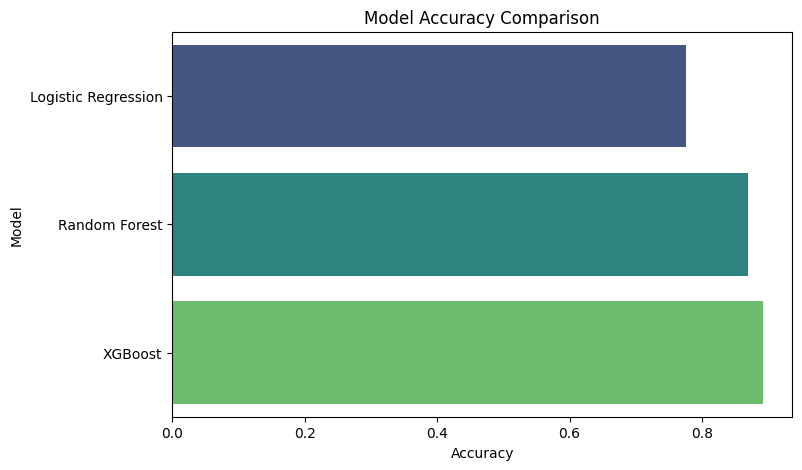

In [50]:
# Store Accuracy Scores
model_scores = {
    "Logistic Regression": accuracy_score(y_test, log_reg_preds),
    "Random Forest": accuracy_score(y_test, rf_preds),
    "XGBoost": accuracy_score(y_test, xgb_preds),
}

# Convert to DataFrame
score_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy'])
print(score_df)

# Plot Accuracy Comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=score_df, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.show()


In [51]:

model_names = ["Logistic Regression", "Random Forest", "XGBoost"]

metrics = {
    "Accuracy": [
        accuracy_score(y_test, log_reg_preds),
        accuracy_score(y_test, rf_preds_tuned),
        accuracy_score(y_test, xgb_preds),
    ],
    "Recall": [
        recall_score(y_test, log_reg_preds),
        recall_score(y_test, rf_preds_tuned),
        recall_score(y_test, xgb_preds),
    ],
    "F1-Score": [
        f1_score(y_test, log_reg_preds),
        f1_score(y_test, rf_preds_tuned),
        f1_score(y_test, xgb_preds),
    ],
}

metrics_array = np.array(list(metrics.values()))


                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.778594       0.775646
1        Random Forest           0.919170       0.869361
2              XGBoost           0.907778       0.891635


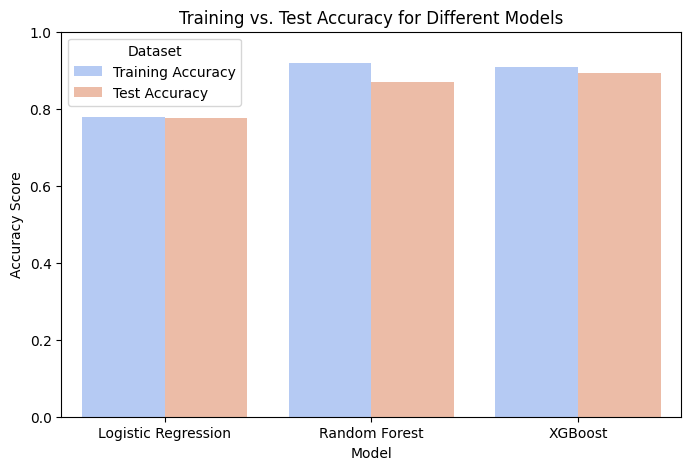

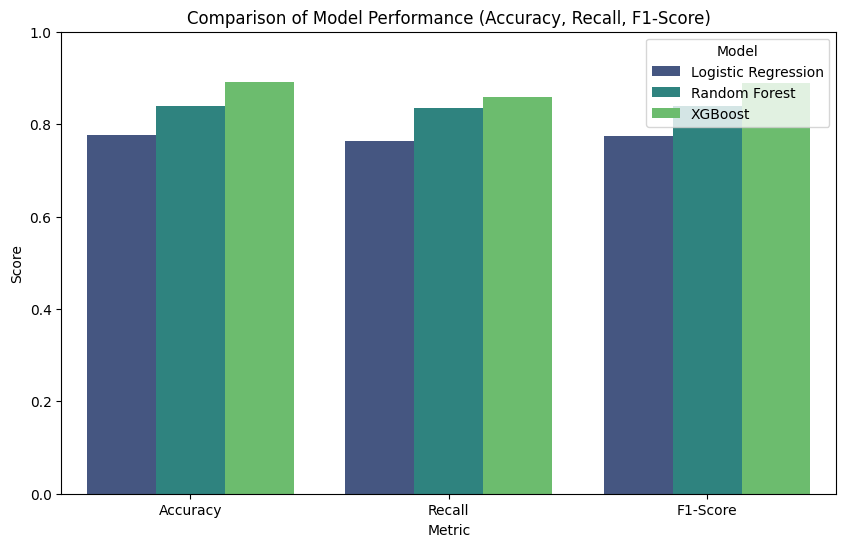

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Get training accuracy
train_acc_log_reg = accuracy_score(y_train, log_reg.predict(X_train))
train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
train_acc_xgb = accuracy_score(y_train, xgb.predict(X_train))

# Get test accuracy
test_acc_log_reg = accuracy_score(y_test, log_reg_preds)
test_acc_rf = accuracy_score(y_test, rf_preds)
test_acc_xgb = accuracy_score(y_test, xgb_preds)

# Store results in a DataFrame
acc_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Training Accuracy": [train_acc_log_reg, train_acc_rf, train_acc_xgb],
    "Test Accuracy": [test_acc_log_reg, test_acc_rf, test_acc_xgb]
})

print(acc_df)

# Melt the DataFrame for visualization
acc_df_melted = acc_df.melt(id_vars="Model", var_name="Dataset", value_name="Accuracy")

# Plot training vs test accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=acc_df_melted, palette="coolwarm")

plt.title("Training vs. Test Accuracy for Different Models")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.legend(title="Dataset")
plt.show()


metrics_df = pd.DataFrame(metrics, index=model_names).reset_index()
metrics_df = metrics_df.melt(id_vars="index", var_name="Metric", value_name="Score")

plt.figure(figsize=(10,6))
sns.barplot(x="Metric", y="Score", hue="index", data=metrics_df, palette="viridis")

plt.title("Comparison of Model Performance (Accuracy, Recall, F1-Score)")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend(title="Model")
plt.show()


In [53]:
best_model_name = score_df.loc[score_df['Accuracy'].idxmax(), 'Model']
models = {
    "Logistic Regression": log_reg,  # Assuming log_reg is your Logistic Regression model
    "Random Forest": rf,           # Assuming rf is your Random Forest model
    "XGBoost": xgb                # Assuming xgb is your XGBoost model
}
best_model_name = score_df.loc[score_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]
import joblib
joblib.dump(best_model, f"best_rainfall_prediction_model_{best_model_name}.pkl")
print(f"\nBest model '{best_model_name}' saved as 'best_rainfall_prediction_model_{best_model_name}.pkl'.")


Best model 'XGBoost' saved as 'best_rainfall_prediction_model_XGBoost.pkl'.


In [54]:
new_data = np.array([[15.0, 28.0, 0.5, 4.0, 8.0, 35.0, 70, 50, 1015.0, 1012.0, 2, 3]])

# Scale new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict with the final model
prediction = best_model.predict(new_data_scaled)
print("Rain Tomorrow Prediction:", "Yes" if prediction[0] == 1 else "No")

Rain Tomorrow Prediction: Yes


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
import numpy as np

# Example input data (Change values to test different scenarios)
new_data = np.array([[15.0, 28.0, 0.5, 4.0, 8.0, 35.0, 70, 50, 1015.0, 1012.0, 2, 3]])

# Scale new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions with all three models
log_reg_pred = log_reg.predict(new_data_scaled)[0]
rf_pred = rf.predict(new_data_scaled)[0]
xgb_pred = xgb.predict(new_data_scaled)[0]

# Display predictions
print("Predictions for the given input:")
print(f"🔹 Logistic Regression: {'Yes' if log_reg_pred == 1 else 'No'}")
print(f"🔹 Random Forest: {'Yes' if rf_pred == 1 else 'No'}")
print(f"🔹 XGBoost: {'Yes' if xgb_pred == 1 else 'No'}")

# Compare predictions
if log_reg_pred == rf_pred == xgb_pred:
    print("\n✅ All models agree on the prediction.")
else:
    print("\n⚠️ Models have different predictions. Further analysis may be needed!")


Predictions for the given input:
🔹 Logistic Regression: No
🔹 Random Forest: No
🔹 XGBoost: Yes

⚠️ Models have different predictions. Further analysis may be needed!


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
# Assuming 'rf' is the best model (Random Forest)
feature_names = X.columns  # Get feature names from the original dataset

print("Feature names in correct order:")
print(feature_names)


Feature names in correct order:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')


In [57]:

importances = xgb.feature_importances_

# Create DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance (optional)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance Order:")
print(feature_importance_df)


Feature Importance Order:
          Feature  Importance
7     Humidity3pm    0.211600
11       Cloud3pm    0.190936
10       Cloud9am    0.152663
2        Rainfall    0.147762
4        Sunshine    0.077506
5   WindGustSpeed    0.077064
9     Pressure3pm    0.053888
3     Evaporation    0.024123
6     Humidity9am    0.018586
1         MaxTemp    0.016400
8     Pressure9am    0.015863
0         MinTemp    0.013608


In [58]:
correct_order = list(feature_names)
new_data_dict = {
    "MinTemp": 12.3, "MaxTemp": 22.5, "Rainfall": 0.0, "Evaporation": 4.3, "Sunshine": 10.5,
    "WindGustSpeed": 31, "Humidity9am": 85, "Humidity3pm": 50, "Pressure9am": 1012,
    "Pressure3pm": 1010, "Cloud9am": 4, "Cloud3pm": 7
}

# Convert to DataFrame and reorder
import pandas as pd
new_data_df = pd.DataFrame([new_data_dict])[correct_order]

# Scale new data
new_data_scaled = scaler.transform(new_data_df)

# Predict
prediction = best_model.predict(new_data_scaled)[0]
print("Predicted Outcome:", "Rain" if prediction == 1 else "No Rain")

Predicted Outcome: No Rain


In [59]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

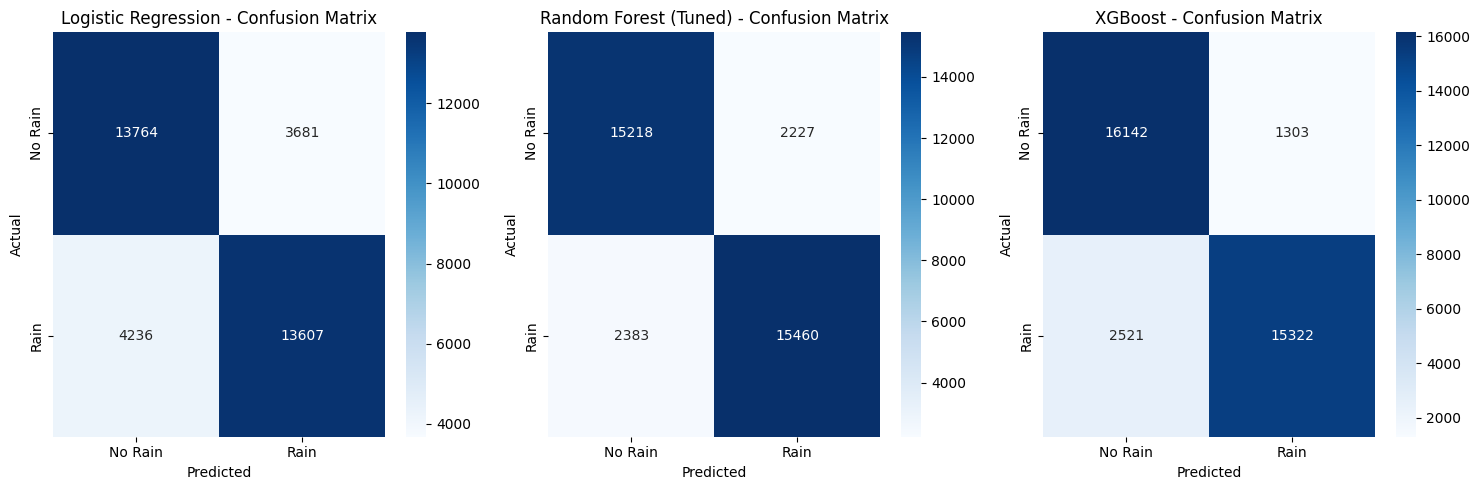


🔹 Logistic Regression - Classification Report 🔹
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     17445
           1       0.79      0.76      0.77     17843

    accuracy                           0.78     35288
   macro avg       0.78      0.78      0.78     35288
weighted avg       0.78      0.78      0.78     35288


🔹 Random Forest (Tuned) - Classification Report 🔹
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     17445
           1       0.87      0.87      0.87     17843

    accuracy                           0.87     35288
   macro avg       0.87      0.87      0.87     35288
weighted avg       0.87      0.87      0.87     35288


🔹 XGBoost - Classification Report 🔹
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17445
           1       0.92      0.86      0.89     17843

    accuracy                           0.89  

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define model names and predictions
model_names = ["Logistic Regression", "Random Forest (Tuned)", "XGBoost"]
model_preds = [log_reg_preds, rf_preds, xgb_preds]
true_labels = y_test

# Plot Confusion Matrix for all models
plt.figure(figsize=(15, 5))

for i, (model, preds) in enumerate(zip(model_names, model_preds)):
    cm = confusion_matrix(true_labels, preds)  # Generate confusion matrix
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
    plt.title(f"{model} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Print Classification Reports for all models
for model, preds in zip(model_names, model_preds):
    print(f"\n🔹 {model} - Classification Report 🔹")
    print(classification_report(true_labels, preds))
